In [1]:
import librosa
from matplotlib import pyplot as plt
import numpy as np
%matplotlib notebook

In [3]:
y, sr = librosa.load("Simple_synth/A3-saw-mono.mp3")
# Use mono = False for stereo tracks

In [5]:
sr # sampling rate

22050

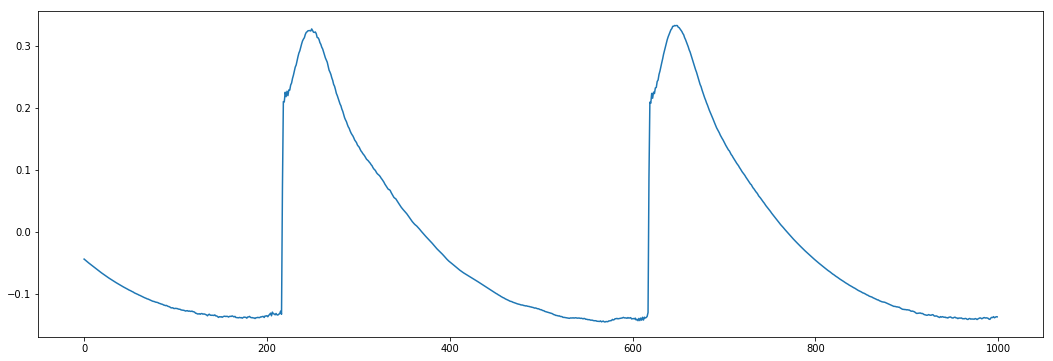

In [6]:
plt.figure(figsize=(18,6))
plt.plot(y[2000:3000])

We can obtain the wave's frequency by dividing the sampling rate by the number of samples it takes for the wave to repeat itself. However, it does not match the frequency of the note

In [7]:
sr/400

55.125

Another option is to use the Fast Fourier Transform to convert the time domain information of the wave to a frequency domain.
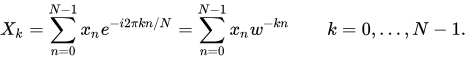 [Image from https://en.wikipedia.org/wiki/Fast_Fourier_transform]

In [10]:
w = np.fft.fft(y)
w[:10]

array([-5.1017523 +0.j        ,  2.077333  +2.4428296j ,
        0.62778544-0.55786175j,  3.4980288 +0.92223626j,
        5.876755  +3.9173622j ,  1.4256518 +5.6914525j ,
        2.0592906 +8.366214j  ,  4.3220387 +5.6435356j ,
        5.05774   +1.0114663j ,  4.6655097 +1.2513715j ], dtype=complex64)

In [11]:
freqs = np.fft.fftfreq(len(y))
freqs[:10]

array([0.00000000e+00, 2.24956696e-05, 4.49913392e-05, 6.74870088e-05,
       8.99826783e-05, 1.12478348e-04, 1.34974018e-04, 1.57469687e-04,
       1.79965357e-04, 2.02461026e-04])

Spectral representation of the wave

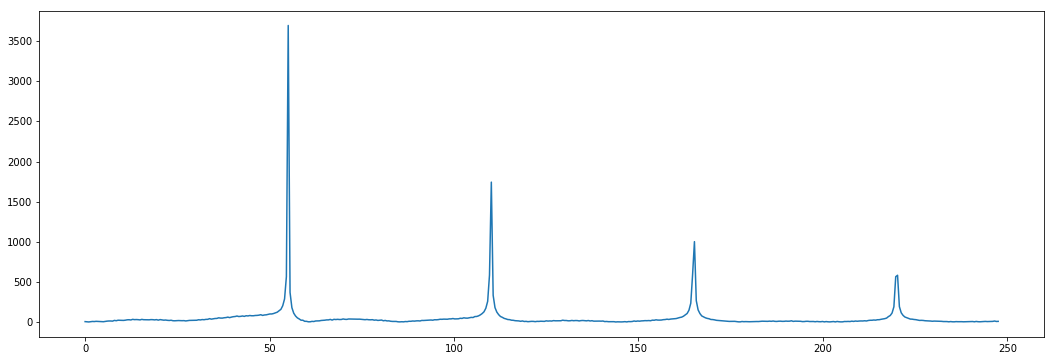

In [14]:
plt.figure(figsize=(18,6))
plt.plot(sr*freqs[0:500],abs(w[0:500]))

Finding the frequency of the highest peak

In [15]:
idx = np.argmax(np.abs(w))
freq = freqs[idx]
freq_in_hertz = abs(freq * sr)
print(freq_in_hertz)

55.0592760893528
